In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random as rnd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [2]:
#Impor Train and Test Data
import os
os.chdir('C:\\Users\\ABIARYAA\\Documents\\Downloads')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
combine = [train_df, test_df]

In [4]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
#Categorical: Survived, Sex, and Embarked. Ordinal: Pclass
#Continous: Age, Fare. Discrete: SibSp, Parch
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include = 'O') #for categ features

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kilgannon, Mr. Thomas J",male,347082,G6,S
freq,1,577,7,4,644


In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], 
                                         as_index = False).mean().sort_values(by ='Survived', ascending =False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


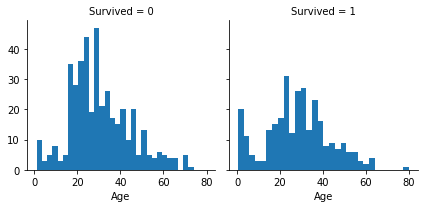

In [13]:
#categ features visualization 1 by 1
g =sns.FacetGrid(data = train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 30)

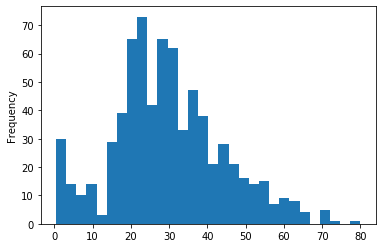

In [14]:
train_df['Age'].plot.hist(bins = 30)

C:\Users\ABIARYAA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


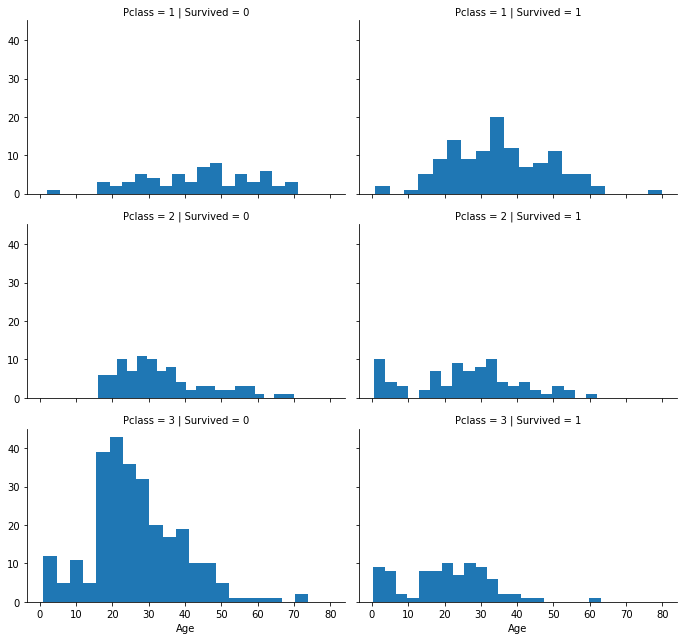

In [15]:
g = sns.FacetGrid(data = train_df, col = 'Survived', row = 'Pclass', size=3, aspect = 1.6)
g.map(plt.hist, 'Age', bins = 20)

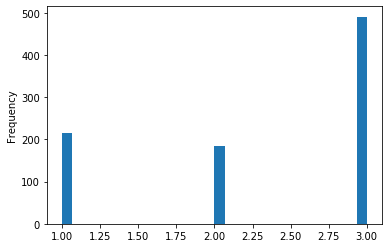

In [16]:
train_df.Pclass.plot.hist(bins = 30
                         )

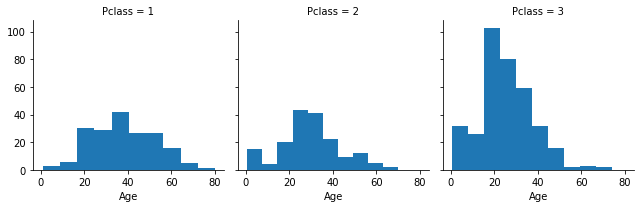

In [17]:
g = sns.FacetGrid(data = train_df, col = 'Pclass')
g.map(plt.hist, 'Age')

C:\Users\ABIARYAA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ABIARYAA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


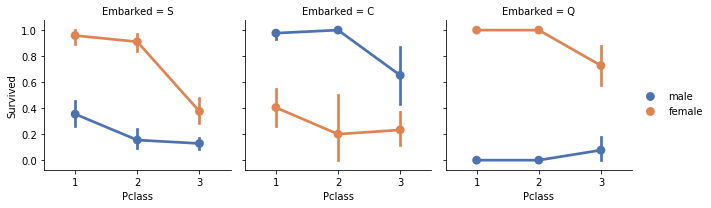

In [18]:
g = sns.FacetGrid(data = train_df, col = 'Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
g.add_legend()

In [19]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\ABIARYAA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


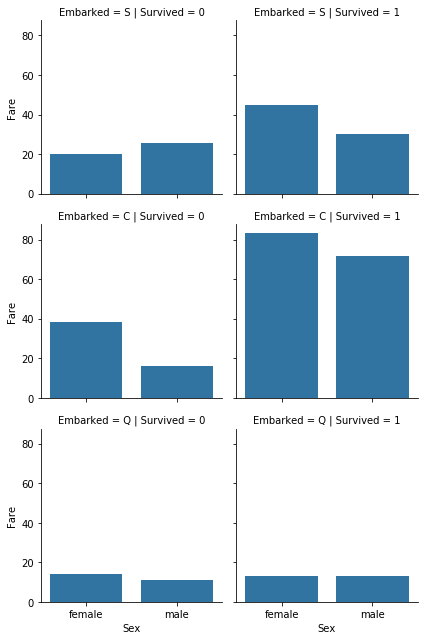

In [20]:
#what is correlation for numerical and categ features
g = sns.FacetGrid(data = train_df, row = 'Embarked', col = 'Survived')
g.map(sns.barplot, "Sex", 'Fare', ci = None)

In [21]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
test_df.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
combine =[train_df, test_df]
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)


Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)
    

In [23]:
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Capt          1
Countess      1
Sir           1
Lady          1
Jonkheer      1
Mme           1
Ms            1
Name: Title, dtype: int64

In [24]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', \
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],  'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [26]:
train_df.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [27]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Title,Survived
2,Mr,0.156673
4,Rare,0.347826
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651


In [28]:
#categorical titles to ordinal
title_mapping = {'Mr': 1, 'Miss':2, 'Mrs': 3, 'Master':4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [30]:
#Now, drop name feature 
train_df.drop('Name', axis = 1, inplace = True)
test_df.drop('Name', axis = 1, inplace = True)
combine = [train_df, test_df]
combine[0].shape, combine[1].shape

((891, 10), (418, 9))

In [31]:
train_df.drop('PassengerId', axis =1, inplace = True)

In [32]:
combine = [train_df, test_df]
combine[0].shape, combine[1].shape

((891, 9), (418, 9))

In [33]:
#Convert Sex to categ numeric
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female':1}).astype(int)

In [34]:
train_df.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int32

# Completing a numerical continuous feature
Now we should start estimating and completing features with missing or null values. 
We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. 
In our case we note correlation among Age, Gender, and Pclass. 
Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models.
The results from multiple executions might vary. We will prefer method 2

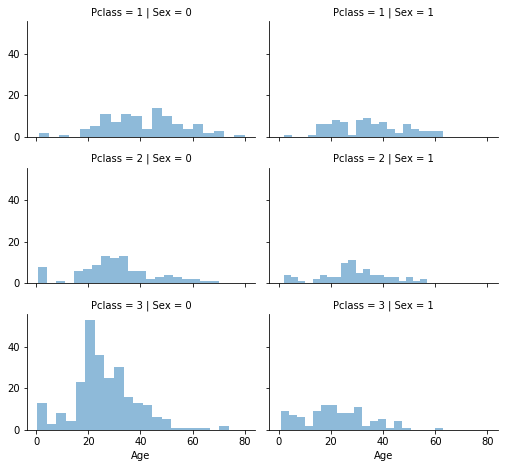

In [35]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [36]:
guess_ages = np.zeros((3,2))
guess_ages

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [37]:
for dataset in combine:
    for i in range(0,3):
        for j in range(0,2):
            age_guess_df = dataset[(dataset['Pclass'] == i+1) & (dataset['Sex'] == j)]['Age'].dropna()
            age_guess = age_guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5   #Round to nearest 0.5 and int value
        
        

In [38]:
guess_ages

array([[42., 41.],
       [28., 24.],
       [24., 22.]])

In [39]:
for dataset in combine:
    for i in range(0,3):
        for j in range(0,2):
            dataset.loc[(dataset['Age'].isnull()) &(dataset['Pclass']== i+1) & (dataset['Sex'] == j),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
    
#     for i in range(0, 2):
#         for j in range(0, 3):
#             dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
#                     'Age'] = guess_ages[i,j]

#     dataset['Age'] = dataset['Age'].astype(int)

In [40]:

print(train_df.Age.min())
print(train_df.Age.max())
train_df.head()

0
80


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [41]:
#Age to age band
train_df['Age_Band'] = pd.cut(train_df['Age'], 5)
train_df['Age_Band'].value_counts()

(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Age_Band, dtype: int64

In [42]:
#See age band(funny looking) corr with survival
train_df[['Age_Band', 'Survived']].groupby(['Age_Band'],
                                           as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Age_Band,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


In [43]:
#Let us replace Age with ordinals based on these bands
for dataset in combine:
    dataset.loc[(dataset.Age <=16 ), 'Age'] = 0
    dataset.loc[(dataset.Age > 16 ) & (dataset.Age <=32), 'Age'] = 1
    dataset.loc[(dataset.Age > 32 ) & (dataset.Age <=48), 'Age'] = 2
    dataset.loc[(dataset.Age > 48 ) & (dataset.Age <=64), 'Age'] = 3
    dataset.loc[(dataset.Age > 64 ) & (dataset.Age <=80), 'Age'] = 4
    

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Band
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [45]:
train_df.drop('Age_Band', axis = 1, inplace = True)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


# Create new feature combining existing features
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [46]:
for dataset in combine:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp']

In [47]:
train_df[['FamilySize', 'Survived']].groupby('FamilySize', 
                                             as_index =False).mean().sort_values(by='Survived', ascending = False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


# Create another feature IsAlone

In [48]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[(dataset['FamilySize']) == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], 
                                           as_index = False).mean().sort_values(by='Survived', ascending = False)

,IsAlone,Survived
1,1,0.552795
0,0,0.346575


In [49]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,1
1,1,1,1,2,71.2833,C,3,1
2,1,3,1,1,7.9250,S,2,0
3,1,1,1,2,53.1000,S,3,1
4,0,3,0,2,8.0500,S,1,0


# Artificial Feature Age*Pclass

In [50]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset['Age']* dataset['Pclass']

In [51]:
train_df.loc[:, ['Age*Pclass', 'Age', 'Pclass']]

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
...,...,...,...
886,2,1,2
887,1,1,1
888,3,1,3
889,1,1,1


In [52]:
train_df.info()  #2 missing in embarked fill it with mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
Fare          891 non-null float64
Embarked      889 non-null object
Title         891 non-null int64
IsAlone       891 non-null int64
Age*Pclass    891 non-null int64
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


In [53]:
freq_embarked = train_df.Embarked.dropna().mode()[0]
freq_embarked

'S'

In [54]:
for dataset in combine:
    dataset['Embarked'].fillna('S', inplace=True)

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
Fare          891 non-null float64
Embarked      891 non-null object
Title         891 non-null int64
IsAlone       891 non-null int64
Age*Pclass    891 non-null int64
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


In [56]:
train_df[['Embarked', 'Survived']].groupby('Embarked', 
                                           as_index = False).mean().sort_values(by='Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [57]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})
  
   

In [58]:
type(dataset['Embarked'][0])

numpy.int64

In [59]:
train_df.Embarked

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [60]:
train_df.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [61]:
# train_df.Embarked = train_df.Embarked.astype(int)
# test_df.Embarked = test_df.Embarked.astype(int)

In [62]:
test_df.Fare.fillna(test_df.Fare.dropna().median(), inplace = True)

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
Fare          891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
IsAlone       891 non-null int64
Age*Pclass    891 non-null int64
dtypes: float64(1), int32(2), int64(6)
memory usage: 55.8 KB


In [64]:
train_df['Fare'].max(), train_df['Fare'].min()

(512.3292, 0.0)

In [65]:
#FareBand
train_df['Fare_band'] = pd.qcut(train_df['Fare'], 4)  #quantiles

In [66]:
train_df[['Fare_band', 'Survived']].groupby(['Fare_band'], 
                                            as_index=False).mean().sort_values(by='Survived', ascending = False)

,Fare_band,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [67]:
for dataset in combine:
    dataset.loc[(dataset['Fare'] <=7.91), 'Fare']= 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare']= 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']= 2
    dataset.loc[(dataset['Fare'] > 31), 'Fare']= 3
    

In [68]:
train_df.drop('Fare_band',axis=1, inplace=True)

In [69]:
combine = [train_df, test_df]

In [70]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0.0,0,1,1,3
1,1,1,1,2,3.0,1,3,1,2
2,1,3,1,1,1.0,0,2,0,3
3,1,1,1,2,3.0,0,3,1,2
4,0,3,0,2,1.0,0,1,0,6
5,0,3,0,1,1.0,2,1,0,3
6,0,1,0,3,3.0,0,1,0,3
7,0,3,0,0,2.0,0,4,0,0
8,1,3,1,1,1.0,0,3,0,3
9,1,2,1,0,2.0,1,3,1,0


In [71]:
test_df.drop('PassengerId', axis=1, inplace=True)
test_df.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,3,0,2,0.0,2,1,0,6
1,3,1,2,0.0,0,3,1,6
2,2,0,3,1.0,2,1,0,6
3,3,0,1,1.0,0,1,0,3
4,3,1,1,1.0,0,3,0,3
5,3,0,0,1.0,0,1,0,0
6,3,1,1,0.0,2,2,0,3
7,2,0,1,2.0,0,1,0,2
8,3,1,1,0.0,1,3,0,3
9,3,0,1,2.0,0,1,0,3


In [72]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
Fare          891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
IsAlone       891 non-null int64
Age*Pclass    891 non-null int64
dtypes: float64(1), int32(2), int64(6)
memory usage: 55.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int32
Age           418 non-null int32
Fare          418 non-null float64
Embarked      418 non-null int64
Title         418 non-null int64
IsAlone       418 non-null int64
Age*Pclass    418 non-null int64
dtypes: float64(1), int32(2), int64(5)
memory usage: 23.0 KB


(None, None)

In [74]:
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_test = test_df
X_train.shape, X_test.shape, Y_train.shape

((891, 8), (418, 8), (891,))

In [75]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
acc_log = round(lr.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\ABIARYAA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.03

In [78]:
coeff_df = pd.DataFrame(train_df.columns.delete(0)) #remove Survived
coeff_df

,0
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,Title
6,IsAlone
7,Age*Pclass


In [79]:
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.167188
5,Title,0.395322
4,Embarked,0.275167
6,IsAlone,0.125190
7,Age*Pclass,-0.101753
3,Fare,-0.109244
2,Age,-0.312439
0,Pclass,-1.087886


In [80]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

C:\Users\ABIARYAA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

In [81]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.73

In [82]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.77

In [83]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.33

In [84]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\ABIARYAA\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.91

In [85]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.47

In [86]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.87

In [87]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.87

In [88]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.87
8,Decision Tree,86.87
0,Support Vector Machines,83.84
1,KNN,83.73
2,Logistic Regression,81.03
6,Stochastic Gradient Decent,80.47
7,Linear SVC,79.91
5,Perceptron,77.33
4,Naive Bayes,76.77


In [94]:
test_df = pd.read_csv('test.csv')

In [95]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

In [96]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
